In [2]:
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import linalg as LA

###

C = 20 #micro F/cm^2
V_K = - 84 #mV
g_K = 8 #mS/cm^2
V_Ca = 120 #mV
g_Ca = 4.4 #mS/cm^2
V_L = -60 #mV
g_L = 2 #mS/cm^2
v1 = -1.2 #mV
v2 = 18 #mV
v3 = 2 #mV
v4 = 30 #mV
phi = 0.04 #per ms


In [3]:
def f(x, I_app=300):
    V, w = x

    
    m_inf = 0.5*(1 + np.tanh((V - v1)/v2))
    w_inf = 0.5*(1 + np.tanh((V - v3)/v4))
    tau = 1/np.cosh((V - v3)/(2*v4))

    
    dxdt = [
        (- g_Ca * m_inf * (V - V_Ca) - g_K * w * ( V - V_K) - g_L *(V - V_L) + I_app)/C,
        
        phi * (w_inf - w)/ tau
    ]
    
    return dxdt


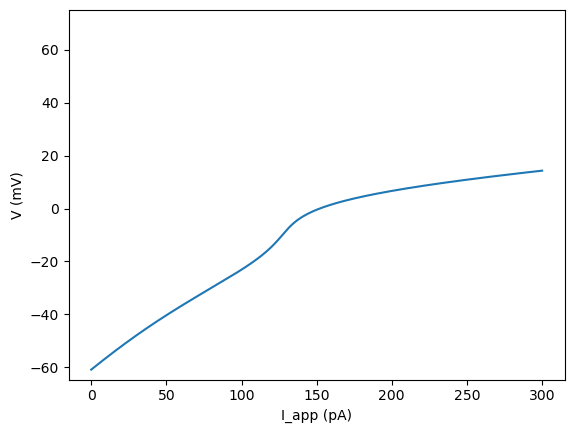

In [18]:
length = 300
I_app = np.linspace(0, 300, length)
V = np.zeros(length)
w = np.zeros(length)

for i in range(len(I_app)):
    sol = fsolve(f, [1,1], args=(I_app[i],))
    V[i], w[i] = sol
    
fig, ax = plt.subplots()

ax.plot(I_app, V,)
plt.ylim(top = 75)

plt.xlabel("I_app (pA)")
plt.ylabel("V (mV)")
plt.show()

## Linearising
Now Moving onto linearising the non-linear system

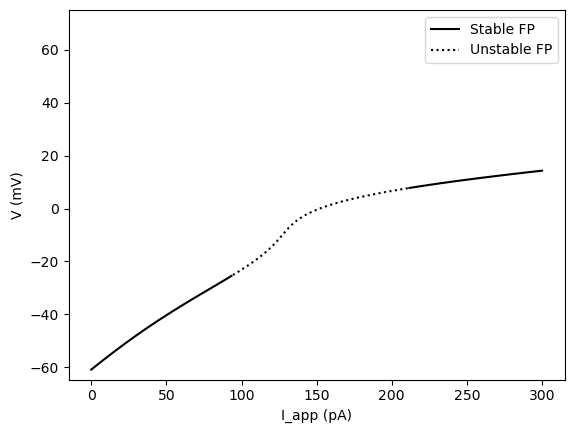

The change from stable to unstable fixed point happens roughly at (94.31438127090301, -25.11128886310555)
The change from unstable to stable fixed point happens roughly at (211.7056856187291, 7.772139732829468)


In [30]:
#index = 55
stability = np.zeros(length)


for i in range(length):
    J=optimize.approx_fprime([V[i], w[i]], f)

    eigenvalues, eigenvectors = LA.eig(J)
    
    if np.real(eigenvalues[0])>=0:
        stability[i] = 1


index_change = np.where(stability == 1)

index_array = index_change[0]



split_I_app = np.split(I_app, [index_array[0], index_array[-1]])
split_V = np.split(V, [index_array[0], index_array[-1]])



fig, ax = plt.subplots()

ax.plot(split_I_app[0], split_V[0],"k", label= "Stable FP")
ax.plot(split_I_app[1], split_V[1], ":k", label="Unstable FP")
ax.plot(split_I_app[2], split_V[2], "k")
ax.legend()
plt.xlabel("I_app (pA)")
plt.ylabel("V (mV)")


plt.ylim(top = 75)
plt.show()

print(f"The change from stable to unstable fixed point happens roughly at ({I_app[index_array[0]]}, {V[index_array[0]]})")
print(f"The change from unstable to stable fixed point happens roughly at ({I_app[index_array[-1]]}, {V[index_array[-1]]})")



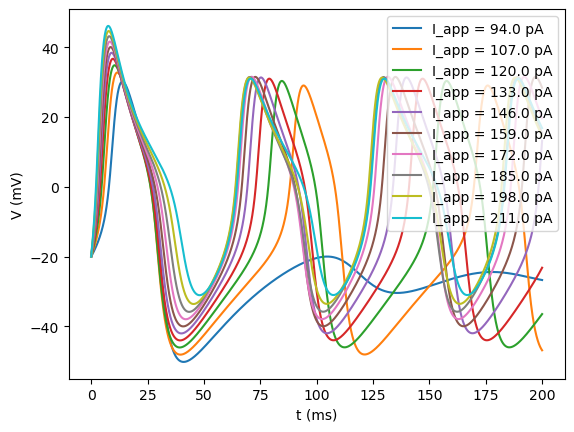

In [34]:
#from Function_bank import Morris_Lecar
def Morris_Lecar(t, x, I_app=300): # My function import doesn't seem to work so I just redefined the function here #help
    V,w=x
    
    m_inf = 0.5*(1 + np.tanh((V - v1)/v2))
    w_inf = 0.5*(1 + np.tanh((V - v3)/v4))
    tau = 1/np.cosh((V - v3)/(2*v4))

    
    dxdt = [
        (- g_Ca * m_inf * (V - V_Ca) - g_K * w * ( V - V_K) - g_L *(V - V_L) + I_app)/C,
        
        phi * (w_inf - w)/ tau
    ]
    
    return dxdt


fig, ax = plt.subplots()

I_app = np.linspace(94, 211, 10)

for i in I_app:
    sol=solve_ivp(Morris_Lecar, t_span=[0, 200], y0 =[-20, 0.1], args=(i,), max_step = 0.05)
    ax.plot(sol.t[:], sol.y[0,:], label = f"I_app = {i} pA")

plt.xlabel("t (ms)")
plt.ylabel("V (mV)")
plt.legend()
plt.show()